##Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Def functions

In [7]:
def z_score(df, ones=True):
  X = df[:, :-1]
  X_mean = np.mean(X, axis=0)
  X_std = np.std(X, axis=0)
  X = (X - X_mean)/X_std #Z-score
  if ones:
      X = np.c_[np.ones((X.shape[0])), X]
  Y = df[:, -1]
  Y_mean = np.mean(Y, axis = 0, keepdims = True)
  Y_std = np.std(Y, axis = 0, keepdims = True)
  Y = (Y - Y_mean)/Y_std #Z-score
  return X, X_mean, X_std, Y, Y_mean, Y_std

def NormalizePoint(point, mean, std):
    return (point-mean)/std

def DenormalizePoint(point, mean, std):
    return (point*std) + mean

In [11]:
def BayesianLinearRegression(X_n, Y_n):
    m0 = np.zeros(X_n.shape[1])
    S0 = 1 * np.eye(X_n.shape[1])
    std0 = 1
    m = m0 + (np.linalg.inv((S0 @ X_n.T @ X_n) + (std0 * np.eye(X_n.shape[1]))) @ S0 @ X_n.T @ (Y_n - (X_n @ m0)))
    S = S0 - (np.linalg.inv((S0 @ X_n.T @ X_n) + (std0 * np.eye(X_n.shape[1]))) @ S0 @ X_n.T @ X_n @ S0)
    return m, S

## Regressão Linear Bayesiana

In [3]:
lin_reg = np.genfromtxt("linear_regression_data.csv", delimiter = ',')

In [9]:
lin_reg_X, lrx_mean, lrx_std, lin_reg_Y, lry_mean, lry_std = z_score(lin_reg)

In [12]:
lm, ls = BayesianLinearRegression(lin_reg_X, lin_reg_Y)

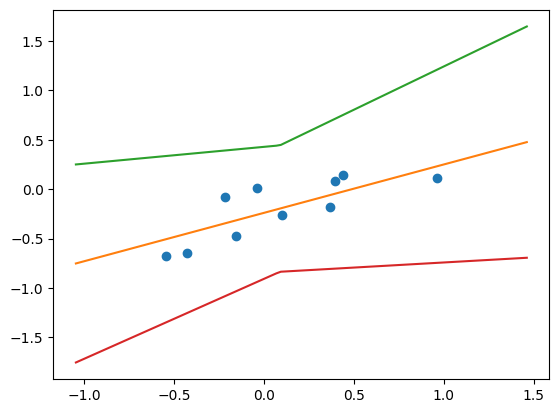

<Figure size 1000x1000 with 0 Axes>

In [13]:
x_plot = np.linspace(np.min(lin_reg[:, 0]) - (0.5), np.max(lin_reg[:, 0]) + (0.5), 100)
x_plot_n = np.c_[np.ones(x_plot.shape),NormalizePoint(x_plot, lrx_mean, lrx_std)]
x, y = lin_reg[:, 0], lin_reg[:, 1]
plt.plot(x, y, 'o')
plt.plot(x_plot, DenormalizePoint(x_plot_n @ lm, lry_mean, lry_std))
plt.plot(x_plot, DenormalizePoint((x_plot_n @ lm) + 2*np.diag(np.max(x_plot_n @ ls @ x_plot_n.T, axis = 1) + (1 * np.eye(x_plot_n.shape[0]))), lry_mean, lry_std))
plt.plot(x_plot, DenormalizePoint((x_plot_n @ lm) - 2*np.diag(np.max(x_plot_n @ ls @ x_plot_n.T, axis = 1) + (1 * np.eye(x_plot_n.shape[0]))), lry_mean, lry_std))
plt.figure(figsize=(10,10))
plt.show()

##Bayesian Polynomial Regression

In [21]:
poly_reg = np.genfromtxt('polynomial_regression_data.csv', delimiter = ',')

In [26]:
degree = 5
temp_poly_x = poly_reg[:, [0]]
temp_poly_y = poly_reg[:, [1]]
for d in range(1,degree):
    temp_poly_x = np.c_[temp_poly_x, temp_poly_x[:, 0]**(d+1)]
poly = np.c_[temp_poly_x, temp_poly_y]

In [27]:
poly_x, prx_mean, prx_std, poly_y, pry_mean, pry_std = z_score(poly)

In [28]:
pm, ps = BayesianLinearRegression(poly_x, poly_y)

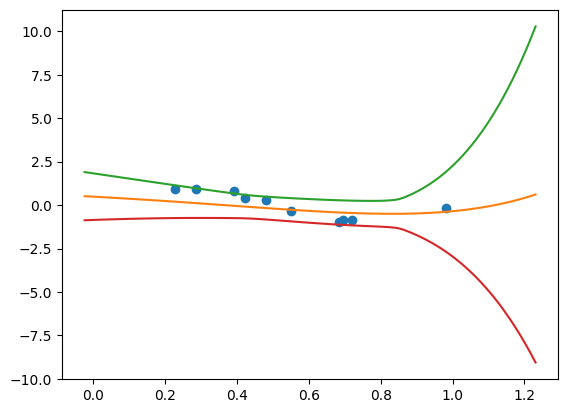

<Figure size 1000x1000 with 0 Axes>

In [32]:
x_plot = np.linspace(np.min(poly_reg[:, 0]) - (0.25), np.max(poly_reg[:, 0]) + (0.25), 100)
x_plot_n = np.copy(x_plot)
for de in range (1, degree):
    x_plot_n = np.c_[x_plot_n, x_plot**(de+1)]
x_plot_n = np.c_[np.ones(x_plot.shape),NormalizePoint(x_plot_n, prx_mean, prx_std)]
x, y = poly_reg[:, 0], poly_reg[:, 1]
plt.plot(x, y, 'o')
plt.plot(x_plot, DenormalizePoint(x_plot_n @ pm, lry_mean, lry_std))
plt.plot(x_plot, DenormalizePoint((x_plot_n @ pm) + 2*np.diag(np.max(x_plot_n @ ps @ x_plot_n.T, axis = 1) + (1 * np.eye(x_plot_n.shape[0]))), lry_mean, lry_std))
plt.plot(x_plot, DenormalizePoint((x_plot_n @ pm) - 2*np.diag(np.max(x_plot_n @ ps @ x_plot_n.T, axis = 1) + (1 * np.eye(x_plot_n.shape[0]))), lry_mean, lry_std))
plt.figure(figsize=(10,10))
plt.show()